

<center><table>
<tr>

<th> <img src= "icons/INL1.png",align="middle",style="width: 10000px;"/> </th>
</tr>
<tr>
<th> <img src="icons/PennNucDataCenter.jpeg"  ,align="middle", style="width: 500px;"/> </th>
</tr>
<center><table>

# <center>Nuclear-Powered Data Centers Economic Optimization Strategy</center>

#### Expected Outcome
- A journal paper evaluating <u>the economic threshold points</u> identifying the conditions under which user requirements would be better suited by a large, small, or micro-reactor. The use case will be focused on data centers and will provide INL with the credential to stake a claim as a leader in nuclear for data center research.

- With a framework on hand, the lab could then leverage its expertise to offer advisory support for the various data centers considering nuclear energy. Further, with interest growing in this area, it is possible that DOE-NE would sponsor research on coupling nuclear reactors with data centers. INL would be well positioned to lead such R&D activities.

#### Activity
- A framework is proposed to evaluate the **economic tradeoff** between large, small, and micro-reactors. 
- The intent is to map out ‘threshold values’ under a given set of requirements 
  - energy demand size
  - reliability 
  
- The framework would parametrize a set of important economic variables to quantifiably differentiate the different reactor classes. 
  - nuclear capacity
  - diseconomies of scale, 
   - economies of mass production, 
   - speed of deployment, 
   - downtime intervals  



### Required Imports

In [1]:
import sys
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

sys.path.insert(1, str( (Path().absolute())  ) + "/src")

from parameters import power_large_ref, color_of, LR_for_power, power_SMR_ref,LR_large ,LR_small, LR_tot_micro
from economies_of_learning import calculate_break_even_cost_for_lr



0.12629270911069268


/var/folders/fn/9991pz_174vgdscjw2zf2tbxtn5546/T/ipykernel_5234/452726336.py:21: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 1100 )


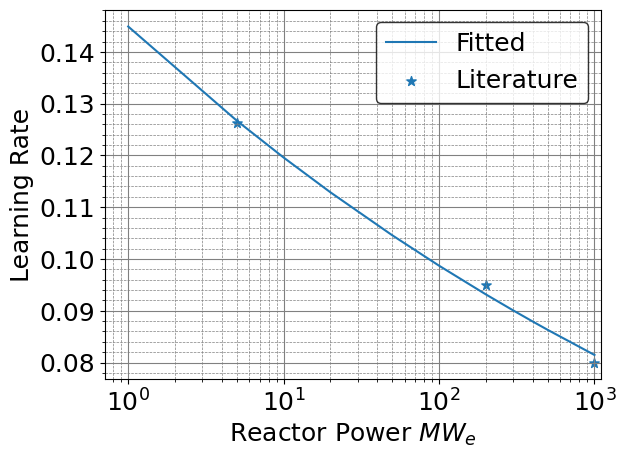

In [4]:
P_list = [1, 5, 10, 20, 50, 100, 200, 300, 400, 500, 1000]
lr_list = []
for P in P_list:
    lr1 = LR_for_power(P)
    lr_list.append(lr1)
plt.plot(P_list, lr_list, label = "Fitted")  

xData_LR = [power_large_ref,  power_SMR_ref, 5]
yData_LR = [LR_large, LR_small, LR_tot_micro]

plt.scatter(xData_LR, yData_LR,marker = "*", s = 50, label ="Literature"  )
plt.xscale('log')
plt.grid(which='major', color='grey', linewidth=0.8)
plt.grid(which='minor', color='grey', linestyle='dashed', linewidth=0.5)
plt.minorticks_on()
    
plt.xlabel('Reactor Power $MW_e$', fontsize=18) 
plt.ylabel('Learning Rate', fontsize=18)  
plt.legend( loc='upper right', fontsize=18, edgecolor='black', fancybox=True) 
# plt.ylim(0.07, 0.15 )
plt.xlim(0, 1100 ) 
plt.yticks(fontsize= 18)
plt.xticks(fontsize= 18)

# plt.tight_layout()
# plt.subplots_adjust(wspace=0.1, 
#                     hspace=0.1)
plt.savefig('results/LR_vs_power.png', bbox_inches='tight')

plt.show()       

Lets start with the cost and LR

In [ ]:
# learning rates
# These are the reasonable min and max values (for plotting and calculating but not the expected ones) 
lr_min = 0
lr_max = 0.17

# power list to consider
pwr_list = [500 ,300 ,200, 100 ,50, 20, 5, 1]
possible_demand_list = [1000, 2000, 5000, 10000] 

# $ \textnormal {Economies of Scale Penalty Crossover Point} = f(Learning Rate, Power)$

In [ ]:
fig = plt.figure(figsize=(19, 15))

demand = 5000

lr_interval   = 0.01
cost_interval = 0.01

ref_large_reactor_cost_per_kw = 1 # the cost here does not matter because we calculate ratios
min_cost_small = ref_large_reactor_cost_per_kw
max_cost_small = 10 *min_cost_small 
fig = plt.figure(figsize=(19, 15))

# number of samples in LR and cost
num_LR_small = 1 + int(np.ceil( (lr_max - lr_min )/ lr_interval) )
num_cost     = 1 + int(np.ceil( ( max_cost_small - min_cost_small )/ cost_interval) )

LR_large_list = [0.02, 0.05, 0.08, 0.1]

for i in range (len( LR_large_list)):  
    LR_large = LR_large_list[i] 
    print( "Learning Rate of large reactors is : ",  LR_large )    
    
    plt.subplot(2, 2, i+1)
    for power in pwr_list:

        
        lr_small_list1 = []
        avg_point_list = []
        for lr_small in np.linspace(lr_min,lr_max ,num_LR_small) :
            num_large_reactors = int(np.ceil(demand/power_large_ref))
            num_small_reactors =  int(np.ceil(demand/power))


            try:
                # For the 8% avg LR for the large reactor
                avg_point = calculate_break_even_cost_for_lr(lr_small, LR_large , LR_large , ref_large_reactor_cost_per_kw,\
                                        num_large_reactors,  num_small_reactors, min_cost_small, max_cost_small, num_cost)
                avg_point_list.append(avg_point[0])
                lr_small_list1.append(lr_small)
            except:
                ...
                
        plt.plot(lr_small_list1, avg_point_list, color = color_of(power) ,label = f"Power = {int(power)} $MW_e$")     

    if LR_large == 0.02 :
        plt.legend( loc='upper left', fontsize=18, edgecolor='black', fancybox=True)   # bbox_to_anchor=(1.05, 1.0)


    plt.grid(which='major', color='grey', linewidth=0.8)
    plt.grid(which='minor', color='grey', linestyle='dashed', linewidth=0.5)
    plt.minorticks_on()
    if LR_large == 0.08 or LR_large == 0.1:
        plt.xlabel('Learning Rate', fontsize=18) 
    if LR_large == 0.08 or LR_large == 0.02:
        plt.ylabel('Economies of Scale Penalty\n Crossover Point\n', fontsize=18)  

    plt.ylim(1, 8 )
    plt.xlim(0, lr_max ) 
    plt.yticks(fontsize= 18)
    plt.xticks(fontsize= 18)

    plt.title(f' Large reactor LR = {LR_large} \n Demand = {demand } $MW_e$', fontsize = 18,  x = 0.73, y = 0.87, backgroundcolor='white') 
# plt.tight_layout()
# plt.subplots_adjust(wspace=0.1, 
#                     hspace=0.1)
plt.savefig('results/lr_vs_costTipping1.png', bbox_inches='tight')

plt.show()     

In [ ]:

# For the learning rate, Using the GAIN meta study
# https://inldigitallibrary.inl.gov/sites/sti/sti/Sort_107010.pdf
large_lr_avg = 0.08 # AVG L 8% Learning rate
large_lr_std = 0.03 # std = 0.03
large_lr_lo = large_lr_avg - large_lr_std
large_lr_hi = large_lr_avg + large_lr_std


fig = plt.figure(figsize=(19, 15))
ref_large_reactor_cost_per_kw = 1 # the cost here does not matter because we calculate ratios

min_cost_small = ref_large_reactor_cost_per_kw
max_cost_small = 10 *min_cost_small 

lr_interval = 0.01
cost_interval = 0.01
    
# number of samples in LR and cost
num_LR_small = 1 + int(np.ceil( (lr_max - lr_min )/ lr_interval) )
num_cost     = 1 + int(np.ceil( ( max_cost_small - min_cost_small )/ cost_interval) )


    
for i in range(len(possible_demand_list))  :
    
    demand = possible_demand_list[i]
    print("Demand (MW) = ", demand)    
    plt.subplot(2, 2, i+1)
    

    
    for power in pwr_list:
    
        
        lr_small_list = []
        lr_small_list1 = []
        breakeven_points_0_list = []
        breakeven_points_1_list = []
        avg_point_list = []
        for lr_small in np.linspace(lr_min,lr_max ,num_LR_small) :
            num_large_reactors = int(np.ceil(demand/power_large_ref))
            num_small_reactors =  int(np.ceil(demand/power))
            try:
                breakeven_points = calculate_break_even_cost_for_lr(lr_small, large_lr_lo, large_lr_hi, ref_large_reactor_cost_per_kw,\
                                        num_large_reactors,  num_small_reactors, min_cost_small, max_cost_small, num_cost)
                lr_small_list.append(lr_small)
                breakeven_points_0_list.append(breakeven_points[0])
                breakeven_points_1_list.append(breakeven_points[1])
            except:
                ...

            try:
                # For the 8% avg LR for the large reactor
                avg_point = calculate_break_even_cost_for_lr(lr_small, large_lr_avg , large_lr_avg , ref_large_reactor_cost_per_kw,\
                                        num_large_reactors,  num_small_reactors, min_cost_small, max_cost_small, num_cost)
                avg_point_list.append(avg_point[0])
                lr_small_list1.append(lr_small)
            except:
                ...
                
        plt.fill_between(lr_small_list, breakeven_points_0_list , breakeven_points_1_list, color = color_of(power),alpha=0.25)  
        plt.plot(lr_small_list1, avg_point_list, color = color_of(power) ,label = f"Power = {int(power)} $MW_e$")     

    if demand == 1000:
        plt.legend( loc='upper left', fontsize=18, edgecolor='black', fancybox=True)   # bbox_to_anchor=(1.05, 1.0)


    plt.grid(which='major', color='grey', linewidth=0.8)
    plt.grid(which='minor', color='grey', linestyle='dashed', linewidth=0.5)
    plt.minorticks_on()
    if demand == 5000 or demand  == 10000:
        plt.xlabel('Learning Rate', fontsize=18) 
    if demand == 1000 or demand == 5000:
        plt.ylabel('Economies of Scale Penalty\n Crossover Point\n', fontsize=18)  

    plt.ylim(1, 8 )
    plt.xlim(0, lr_max ) 
    plt.yticks(fontsize= 18)
    plt.xticks(fontsize= 18)

    plt.title(f' Demand = {demand } $MW_e $', fontsize=18,  x =0.72, y=0.9, backgroundcolor='white') 
# plt.tight_layout()
# plt.subplots_adjust(wspace=0.1, 
#                     hspace=0.1)
plt.savefig('results/lr_vs_costTipping2.png', bbox_inches='tight')

plt.show()     

# $ \textnormal {Economies of Scale Penalty Crossover Point} = f(Demand, Power)$
## Learning rate is reflected in the uncertainty

In [ ]:
fig = plt.figure(figsize=(19, 30))

large_reactor_ref_power = power_large_ref

# For the learning rate, Using the GAIN meta study
# https://inldigitallibrary.inl.gov/sites/sti/sti/Sort_107010.pdf
large_lr_avg = 0.08 # AVG L 8% Learning rate
large_lr_std = 0.03 # std = 0.03
large_lr_lo = large_lr_avg - large_lr_std
large_lr_hi = large_lr_avg + large_lr_std

# for smaller reactors
small_lr_avg = 0.095 # AVG L 8% Learning rate
small_lr_std = large_lr_std # std = 0.03
small_lr_lo = small_lr_avg - small_lr_std
small_lr_hi = small_lr_avg + small_lr_avg


min_cost_small = ref_large_reactor_cost_per_kw
cost_interval = 0.01
max_cost_small = 12 * ref_large_reactor_cost_per_kw
num_cost     = 1 + int(np.ceil( ( max_cost_small - min_cost_small )/ cost_interval) )
LR_interval =  0.01

pwr_list = [500 , 300, 200, 100, 50, 20, 5, 1]
for ii in range(len(pwr_list)):
    power = pwr_list[ii]
    
    plt.subplot(4, 2, ii+1)
    
    print("Power (MW) = ",power)

    breakeven_point_0_list = []
    breakeven_point_1_list = []
    demand_list = []
    avg_cost_tipping_list = []
    cost_tipping_1_low_list = []
    cost_tipping_1_hi_list = []
    cost_tipping_2_lo_list = []
    cost_tipping_3_hi_list = []
        
    for demand in   np.linspace(1000, 10000, 10) :
        
         
        demand_list.append( demand)
        
        num_large_reactors = int(np.ceil(demand/large_reactor_ref_power))
        num_small_reactors =  int(np.ceil(demand/power))
    
        # This is based on avg lr for small reactor and also average LR for large reactor
        avg_cost_tipping = (calculate_break_even_cost_for_lr(small_lr_avg, large_lr_avg, large_lr_avg, ref_large_reactor_cost_per_kw ,\
                                     num_large_reactors,  num_small_reactors, min_cost_small, max_cost_small, num_cost))[0]
        avg_cost_tipping_list.append(avg_cost_tipping)
    
        # lets add the uncertainty because of the learning rate of the large reactors
        cost_tipping_1 = (calculate_break_even_cost_for_lr(small_lr_avg, large_lr_lo, large_lr_hi, ref_large_reactor_cost_per_kw ,\
                                     num_large_reactors,  num_small_reactors, min_cost_small, max_cost_small, num_cost))
        cost_tipping_1_low_list.append(cost_tipping_1[0])
        cost_tipping_1_hi_list.append(cost_tipping_1[1])
    
        # if the LR of the small reactor is low
        cost_tipping_2 = (calculate_break_even_cost_for_lr(small_lr_lo, large_lr_lo, large_lr_hi, ref_large_reactor_cost_per_kw ,\
                                     num_large_reactors,  num_small_reactors, min_cost_small, max_cost_small, num_cost))
        # we take the lower bound here (because this is lowest ever)
        cost_tipping_2_lo_list.append(min(cost_tipping_2))
        
        # if the LR of the small reactor is high
        cost_tipping_3 = (calculate_break_even_cost_for_lr(small_lr_hi, large_lr_lo, large_lr_hi, ref_large_reactor_cost_per_kw ,\
                                     num_large_reactors,  num_small_reactors, min_cost_small, max_cost_small, num_cost))
        # we take the upper bound here (because this is highest ever)
        cost_tipping_3_hi_list.append(max(cost_tipping_3))
       
    plt.fill_between(demand_list, cost_tipping_2_lo_list, cost_tipping_3_hi_list, alpha=0.1, color =  color_of(power))
    plt.fill_between(demand_list, cost_tipping_1_low_list, cost_tipping_1_hi_list, alpha=0.3, color =  color_of(power)) 
    
    #     avg_tipping_cost = [np.average(i) for i in zip(breakeven_point_0_list,  breakeven_point_1_list)]  
    plt.plot(demand_list, avg_cost_tipping_list  , '-o' , markersize = 7 , label = f"Power = {int(power)} $MW_e$", color =  color_of(power)) 
    plt.legend( loc='upper left', fontsize=18)   # bbox_to_anchor=(1.05, 1.0) #  edgecolor='black'
    plt.yscale("log")
    plt.xscale("log")
    
    plt.grid(which='major', color='grey', linewidth=0.8)
    
    
     
    plt.gca().yaxis.set_major_formatter(mpl.ticker.NullFormatter()) 
    plt.gca().yaxis.set_minor_formatter(mpl.ticker.NullFormatter())
    plt.gca().xaxis.set_major_formatter(mpl.ticker.NullFormatter()) 
    plt.gca().xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
       
    

    plt.gca().yaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
    plt.gca().xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
    # plt.gca().yaxis.set_minor_formatter(mpl.ticker.ScalarFormatter())


    plt.yticks( [1, 1.2, 1.4, 1.6, 1.8, 2, 2.5, 3, 3.5, 4, 4.5, 5,5.5, 6, 7, 8, 9, 10, 11])
    plt.xticks( [1000, 2000, 3000, 4000, 5000, 7000, 10000])
    plt.grid(which='minor', color='grey', linestyle='dashed', linewidth=0.5)
    plt.minorticks_on()
    


    if power in [ 5, 1]:
        plt.xlabel('Demand ($MW_e$)', fontsize=18) 
    if power in [500, 200, 50, 5]:
        plt.ylabel('Economies of Scale Penalty\n Crossover Point\n', fontsize=18)  
    
    plt.ylim(1, 11 )
    plt.xlim(demand_list[0], demand_list[-1])
    plt.yticks(fontsize=17)
    plt.xticks(fontsize=17)

plt.savefig('results/demand_vs_CostTipping.png')

# $ \textnormal {Economies of Scale Penalty Crossover Point} = f(Demand, Power)$ : (power on the x-axis)
## Learning rate is reflected in the uncertainty

In [ ]:
fig = plt.figure(figsize=(19, 15))


ref_large_reactor_cost_per_kw = 1 # the cost here does not matter because we calculate ratios



# For the learning rate, Using the GAIN meta study
# https://inldigitallibrary.inl.gov/sites/sti/sti/Sort_107010.pdf
large_lr_avg = 0.08 # AVG L 8% Learning rate
large_lr_std = 0.03 # std = 0.03
large_lr_lo = large_lr_avg - large_lr_std
large_lr_hi = large_lr_avg + large_lr_std

# for smaller reactors
small_lr_avg = 0.095 # AVG L 8% Learning rate
small_lr_std = large_lr_std # std = 0.03
small_lr_lo = small_lr_avg - small_lr_std
small_lr_hi = small_lr_avg + small_lr_avg


min_cost_small = ref_large_reactor_cost_per_kw
cost_interval = 0.01
max_cost_small = 12 * ref_large_reactor_cost_per_kw
num_cost     = 1 + int(np.ceil( ( max_cost_small - min_cost_small )/ cost_interval) )
LR_interval =  0.01

demand_list = [1000 , 2000, 5000, 10000]

power_values = [1, 5, 10, 20, 50, 100, 200, 300, 400, 500]
for ii in range (len(demand_list)):
    
    demand = demand_list[ii]
    
    plt.subplot(2, 2, ii+1)
    
    print(f'Demand = {demand} MW')
    
    avg_cost_tipping_list = []
    cost_tipping_1_low_list =[]
    cost_tipping_1_hi_list = []
    cost_tipping_2_lo_list = []
    cost_tipping_3_hi_list = []
    
    for power in power_values:
        
    
        num_large_reactors = int(np.ceil(demand/large_reactor_ref_power))
        num_small_reactors =  int(np.ceil(demand/power))
    
    
    
     # This is based on avg lr for small reactor and also average LR for large reactor
        avg_cost_tipping = (calculate_break_even_cost_for_lr(small_lr_avg, large_lr_avg, large_lr_avg, ref_large_reactor_cost_per_kw ,\
                                     num_large_reactors,  num_small_reactors, min_cost_small, max_cost_small, num_cost))[0]
        avg_cost_tipping_list.append(avg_cost_tipping)
    
        # lets add the uncertainty because of the learning rate of the large reactors
        cost_tipping_1 = (calculate_break_even_cost_for_lr(small_lr_avg, large_lr_lo, large_lr_hi, ref_large_reactor_cost_per_kw ,\
                                     num_large_reactors,  num_small_reactors, min_cost_small, max_cost_small, num_cost))
        cost_tipping_1_low_list.append(cost_tipping_1[0])
        cost_tipping_1_hi_list.append(cost_tipping_1[1])
    
        # if the LR of the small reactor is low
        cost_tipping_2 = (calculate_break_even_cost_for_lr(small_lr_lo, large_lr_lo, large_lr_hi, ref_large_reactor_cost_per_kw ,\
                                     num_large_reactors,  num_small_reactors, min_cost_small, max_cost_small, num_cost))
        # we take the lower bound here (because this is lowest ever)
        cost_tipping_2_lo_list.append(min(cost_tipping_2))
        
        # if the LR of the small reactor is high
        cost_tipping_3 = (calculate_break_even_cost_for_lr(small_lr_hi, large_lr_lo, large_lr_hi, ref_large_reactor_cost_per_kw ,\
                                     num_large_reactors,  num_small_reactors, min_cost_small, max_cost_small, num_cost))
        # we take the upper bound here (because this is highest ever)
        cost_tipping_3_hi_list.append(max(cost_tipping_3))
    


    plt.fill_between(power_values, cost_tipping_2_lo_list, cost_tipping_3_hi_list, alpha=0.1, color =  'tab:purple')
    plt.fill_between(power_values, cost_tipping_1_low_list, cost_tipping_1_hi_list, alpha=0.3, color =  'tab:purple') 
    
    #     avg_tipping_cost = [np.average(i) for i in zip(breakeven_point_0_list,  breakeven_point_1_list)]  
    plt.plot(power_values, avg_cost_tipping_list  , '-o' , markersize = 3 , label = f"Demand = {demand} $MW_e$", color =  'tab:purple' ) 
    plt.xscale('log')

    
    plt.legend( loc='upper right', fontsize=18, edgecolor='black', fancybox=True)   # bbox_to_anchor=(1.05, 1.0)
    
    
    plt.grid(which='major', color='grey', linewidth=0.8)
    plt.grid(which='minor', color='grey', linestyle='dashed', linewidth=0.5)
    plt.minorticks_on()
    if demand in [5000, 10000]:
        plt.xlabel('Power ($MW_e$)', fontsize=18) 
    if demand in [1000, 5000]:
        
        plt.ylabel('Economies of Scale Penalty\n Crossover Point\n', fontsize=18)  
    
    
    plt.gca().yaxis.set_minor_formatter(mpl.ticker.NullFormatter())
    plt.gca().xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
    # plt.gca().xaxis.set_minor_formatter(mpl.ticker.ScalarFormatter())


    plt.xticks( [1, 2, 3, 4, 5, 10, 20, 50, 100, 200,  500 ]) # 2, 3, 4, 5, 6,7,8,9, 10,20, 30, 40 ,50, 60, 70, 80, 90, 100, 200, 300, 400,  500])
    
    
    plt.ylim(1, 11 )
    plt.xlim(power_values[0], power_values[-1])
    plt.yticks(fontsize=17)
    plt.xticks(fontsize=17)
    plt.savefig('results/power_vs_CostTipping_2.png')